In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

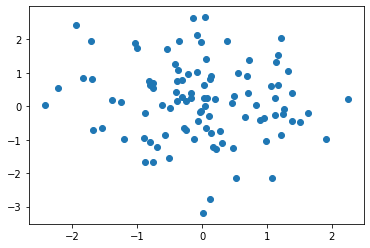

In [2]:
points = np.random.randn(100, 2)
plt.scatter(points[:, 0], points[:, 1])

In [3]:
class KMeans:
    
    def __init__(self, k=3, tol=1e-4, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
        
    def fit(self, data):
        self.centroids = {}
        
        np.random.shuffle(data)
        for i in range(self.k):
            self.centroids[i] = data[i]
        
        for i in range(self.max_iter):
            self.classifications = {}
            for j in range(self.k):
                self.classifications[j] = []
                
            for d in data:
                distances = [np.linalg.norm(d-self.centroids[c]) for c in self.centroids]
                classification = np.argmin(distances)
                self.classifications[classification].append(d)
            
            prev_centroids = dict(self.centroids)
            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification], axis=0)
            ok = True
            for c in self.centroids:
                prev = prev_centroids[c]
                cur = self.centroids[c]
                if np.sum((prev-cur) / prev * 100.0) > self.tol:
                    ok = False
                    break
            if ok:
                break

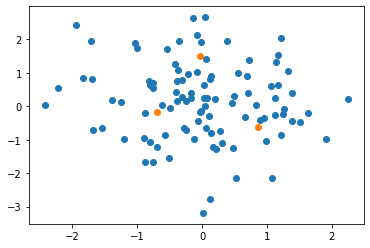

In [4]:
a = KMeans()
a.fit(points)

centroids = np.array([val for val in a.centroids.values()])

plt.scatter(points[:, 0], points[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1])